In [1]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision import transforms

In [2]:
tensor_train = datasets.CIFAR10("./data", True, download=True, transform=transforms.ToTensor())
tensor_test = datasets.CIFAR10("./data", False, download=True, transform=transforms.ToTensor())

class_names = ["automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Files already downloaded and verified
Files already downloaded and verified


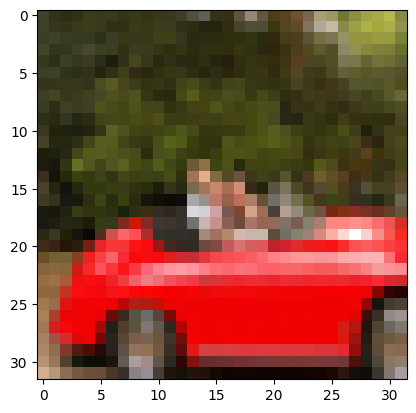

In [3]:
img_t, _ = tensor_train[99]
plt.imshow(img_t.permute(1, 2, 0))

In [4]:
imgs = torch.stack([img for img, _ in tensor_train], dim=-1)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [5]:
mean = imgs.view(3,-1).mean(dim=1)
std = imgs.view(3,-1).std(dim=1)
mean, std

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9892126..2.0945773].


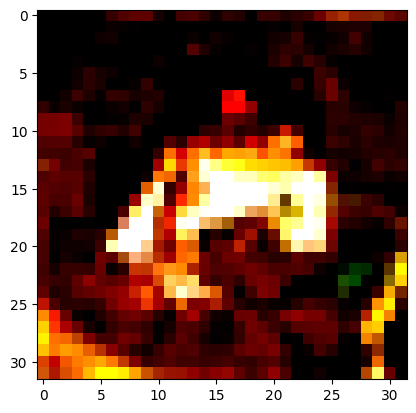

In [6]:
tensor_train = datasets.CIFAR10("./data", train=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
]))

plt.imshow(tensor_train[0][0].permute(1, 2, 0))